<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-к-исследованию" data-toc-modified-id="Загрузка-данных-и-подготовка-к-исследованию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка к исследованию</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Портрет-клиента" data-toc-modified-id="Портрет-клиента-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Портрет клиента</a></span></li><li><span><a href="#Срезы-и-графики" data-toc-modified-id="Срезы-и-графики-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Срезы и графики</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li></ul></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Статистический анализ</a></span><ul class="toc-item"><li><span><a href="#Тест-Шапиро-Уилка-на-нормальность-для-гипотезы-№-1" data-toc-modified-id="Тест-Шапиро-Уилка-на-нормальность-для-гипотезы-№-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тест Шапиро-Уилка на нормальность для гипотезы № 1</a></span></li></ul></li><li><span><a href="#Промежуточный-итог" data-toc-modified-id="Промежуточный-итог-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Промежуточный итог</a></span></li><li><span><a href="#Сегментация-на-основе-выделенных-показателей" data-toc-modified-id="Сегментация-на-основе-выделенных-показателей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сегментация на основе выделенных показателей</a></span><ul class="toc-item"><li><span><a href="#Приоритизация-полученных-показателей" data-toc-modified-id="Приоритизация-полученных-показателей-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Приоритизация полученных показателей</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации-для-заказчика" data-toc-modified-id="Выводы-и-рекомендации-для-заказчика-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации для заказчика</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime, timedelta
from plotly import graph_objects as go
import plotly.express as px

# Аналитическое исследование для "Метанпромбанк"

## Загрузка данных и подготовка к исследованию

In [2]:
try:
    data = pd.read_csv("C:/Users/D15/'yandex-praktikum-projects'/Final Project/bank_scrooge.csv")
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
display(data)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


In [5]:
data.rename(columns = {'USERID':'user_id', 'score':'credit_score', 'EST_SALARY':'income'}, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   credit_score   10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  income         10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


In [6]:
# работа с пропусками
print(data['age'].isna().value_counts(normalize=True) * 100)
print(data['balance'].isna().value_counts(normalize=True) * 100)

False    99.74
True      0.26
Name: age, dtype: float64
False    77.05
True     22.95
Name: balance, dtype: float64


In [7]:
# природа пропусков
data_b = data[data['balance'].isna()]
#display(data_b.head(20))
#print(data[data['balance'] == 0].count())

* Вывод:
    * пропуски в возрасте 0.2% - удаляем
    * пропуски в балансе - почти 23%. Заполнение 0 приведет к искажению расчётов и графиков. Оставляем пропуски без изменений.

In [8]:
# уберём float
data['credit_score'] = data['credit_score'].astype(int)
data = data.dropna(subset=['age'])
data['age'] = data['age'].astype(int)

In [9]:
# добавление бинарных столбцов
data_copy = data.copy()
data = pd.get_dummies(data, columns=['gender', 'city'])
data['city'] = data_copy['city'] 
data['gender'] = data_copy['gender']
display(data)

,user_id,credit_score,age,equity,balance,products,credit_card,last_activity,income,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender
0,183012,850,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Рыбинск,Ж
1,146556,861,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Рыбинск,Ж
2,120722,892,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Рыбинск,Ж
3,225363,866,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ярославль,Ж
4,157978,730,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,Ярославль,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,27,1,78144.65,1,0,1,18943.64,0,0,1,0,1,0,Рыбинск,М
9996,139170,894,46,0,NaN,1,1,0,196898.29,0,0,1,0,0,1,Ярославль,М
9997,115639,903,24,0,NaN,2,1,1,108905.09,0,0,1,0,0,1,Ярославль,М
9998,148700,777,68,3,865457.97,3,0,1,86874.90,0,1,0,0,0,1,Ярославль,Ж


In [10]:
# дубликаты пользователей
x = data['user_id'].value_counts().reset_index()
x = x.query('user_id == 2')
#print(x)

* Вывод:
    * user_id имеет 50 дубликатов. Выборочная оценка показала, что идечные идентификаторы относятся к совершенно разным людям. Вероятно, база продублировалась при выгрузке из разных городов. Данные остаются.

In [11]:
# на одном из последующих шагов было выявлено, что есть один пользователь, количество продуктов которого равно нулю. Удалим его.
data = data.query('products != 0')

In [12]:
# добавим кредитную категорию (согласно рейтингу шкалы Эквифакс)
data.insert(loc=2, column='credit_category', value=" ")

def credi(mean):
    if 1 < mean < 595:
        mean = 'очень плохой'
    elif 595 <= mean < 796:
        mean = 'плохой'
    elif 766 <= mean < 895:
        mean = 'средний'
    elif 895 <= mean < 950:
        mean = 'хороший'
    elif 950 <= mean <= 1000:
        mean = 'очень хороший'
    else:
        mean = 'error'
    return mean

data['credit_category'] = data['credit_score'].map(credi)

## Исследовательский анализ данных

### Портрет клиента

In [13]:
display(data)

,user_id,credit_score,credit_category,age,equity,balance,products,credit_card,last_activity,income,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender
0,183012,850,средний,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Рыбинск,Ж
1,146556,861,средний,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Рыбинск,Ж
2,120722,892,средний,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Рыбинск,Ж
3,225363,866,средний,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ярославль,Ж
4,157978,730,плохой,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,Ярославль,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,средний,27,1,78144.65,1,0,1,18943.64,0,0,1,0,1,0,Рыбинск,М
9996,139170,894,средний,46,0,NaN,1,1,0,196898.29,0,0,1,0,0,1,Ярославль,М
9997,115639,903,хороший,24,0,NaN,2,1,1,108905.09,0,0,1,0,0,1,Ярославль,М
9998,148700,777,плохой,68,3,865457.97,3,0,1,86874.90,0,1,0,0,0,1,Ярославль,Ж


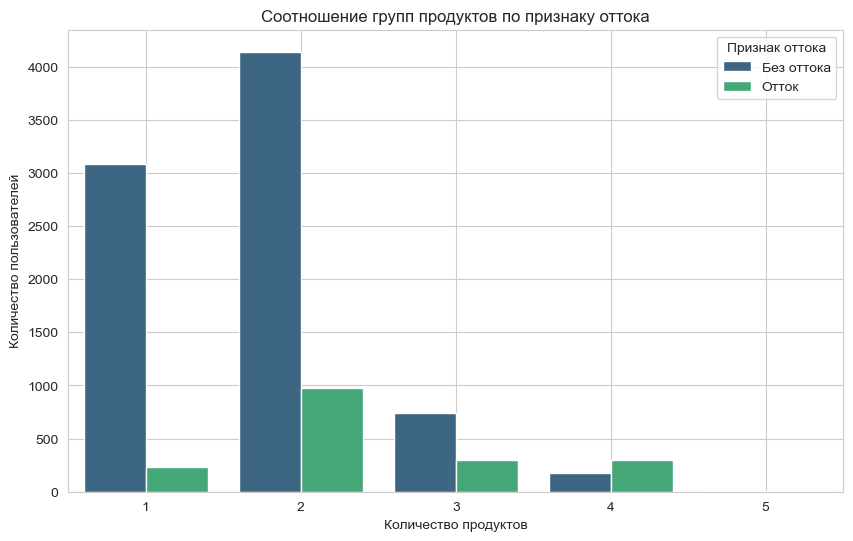

In [14]:
# соотношение групп продуктов по признаку оттока
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='products', hue='churn', data=data, palette='viridis')

plt.title('Соотношение групп продуктов по признаку оттока')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество пользователей')
plt.grid(True)
legend_labels = ['Без оттока', 'Отток']
plt.legend(legend_labels, title='Признак оттока', loc='upper right')
plt.show()

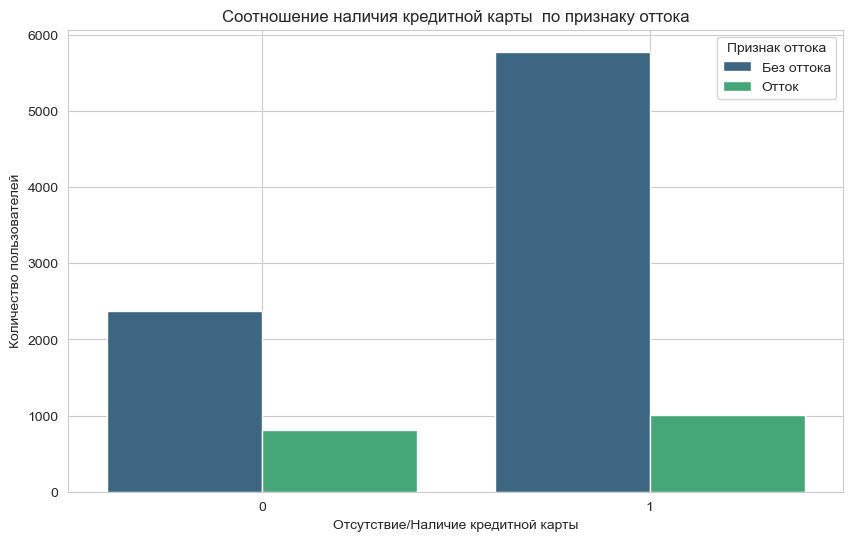

In [15]:
# соотношение наличия/отсутствия кредитной карты по признаку оттока
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_card', hue='churn', data=data, palette='viridis')

plt.title('Соотношение наличия кредитной карты  по признаку оттока')
plt.xlabel('Отсутствие/Наличие кредитной карты')
plt.ylabel('Количество пользователей')
plt.grid(True)
legend_labels = ['Без оттока', 'Отток']
plt.legend(legend_labels, title='Признак оттока', loc='upper right')
plt.show()

* Вывод: наличие кредитной карты не сильно влияет на отток

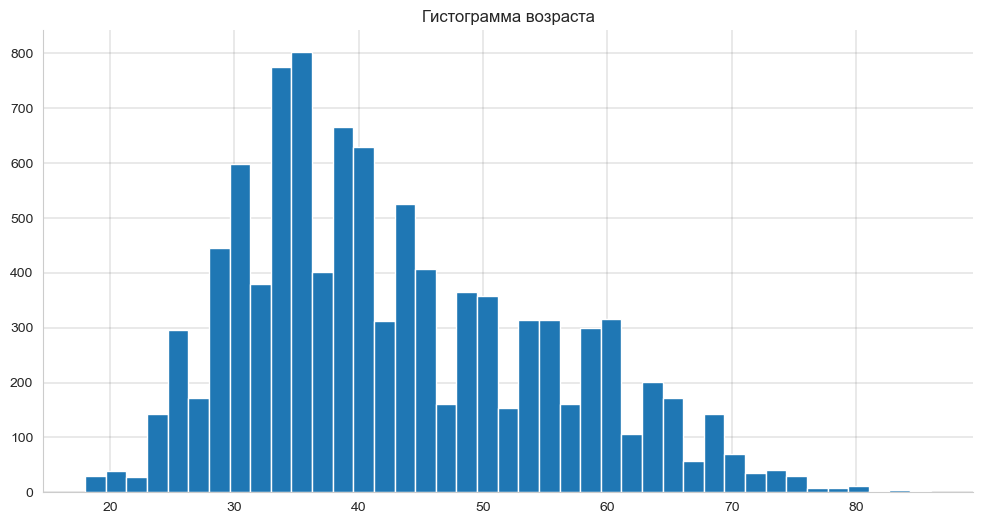

In [16]:
# добавим категорию по возрасту
data.insert(loc=4, column='age_category', value=" ")

fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
data['age'].hist(bins=41, ax=ax)
ax.grid(color='grey', lw=0.25)
ax.set_title("Гистограмма возраста")
plt.show()

In [17]:
# категоризируем возраст
age_1 = data['age'] < 30
age_2 = (data['age'] >= 30) & (data['age'] < 40)
age_3 = (data['age'] >= 40) & (data['age'] < 53)
age_4 = (data['age'] >= 53) & (data['age'] < 60)
age_5 = (data['age'] >= 60)

# именуем сами категории
data.loc[age_1, 'age_category'] = '18-29 лет'
data.loc[age_2, 'age_category'] = '30-39 лет'
data.loc[age_3, 'age_category'] = '40-52 лет'
data.loc[age_4, 'age_category'] = '53-59 лет'
data.loc[age_5, 'age_category'] = '60+ лет'

# посмотрим что получилось по размерам
data['age_category'].value_counts().sort_index()

18-29 лет    1148
30-39 лет    3624
40-52 лет    2913
53-59 лет    1088
60+ лет      1200
Name: age_category, dtype: int64

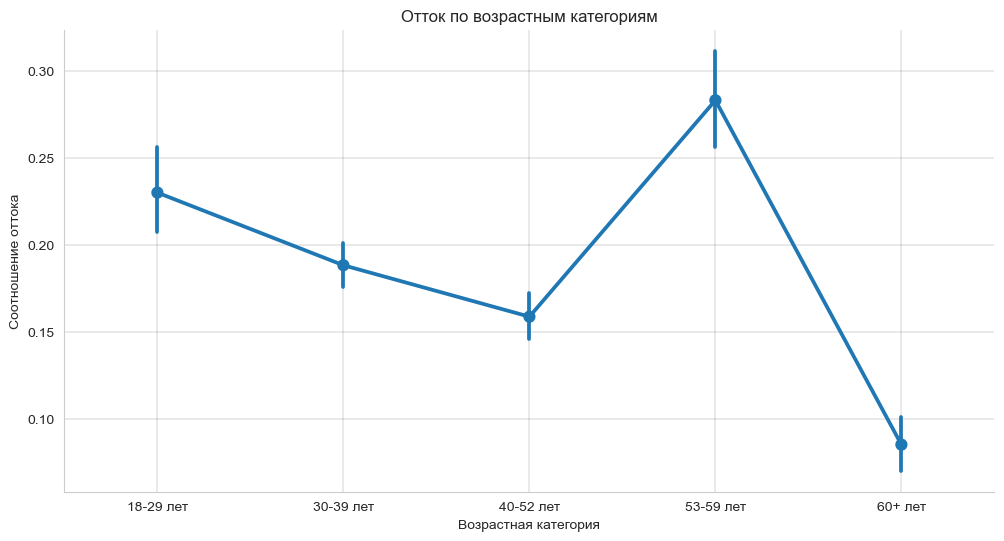

In [18]:
# оцениваем отток по сделанным категориям
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=data, x='age_category', y='churn', ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title("Отток по возрастным категориям")
ax.set_xlabel('Возрастная категория')
ax.set_ylabel('Соотношение оттока')
plt.show();

 * Вывод: график показывает повышенный отток для двух категорий: 18-29 лет и 53-59 лет

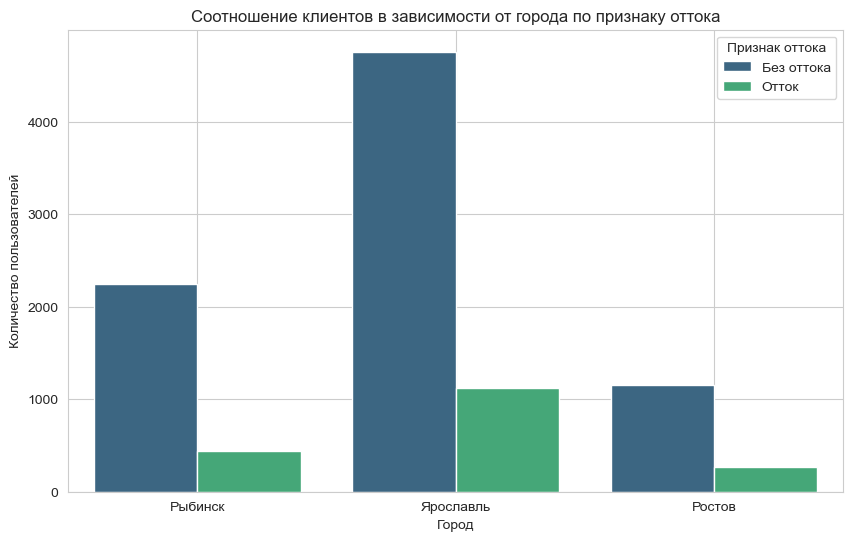

In [19]:
# количество клиентов в зависимости от города
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='churn', data=data, palette='viridis')

plt.title('Соотношение клиентов в зависимости от города по признаку оттока')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.grid(True)
legend_labels = ['Без оттока', 'Отток']
plt.legend(legend_labels, title='Признак оттока', loc='upper right')
plt.show()

* Вывод: больший признак оттока показывает Ярославль

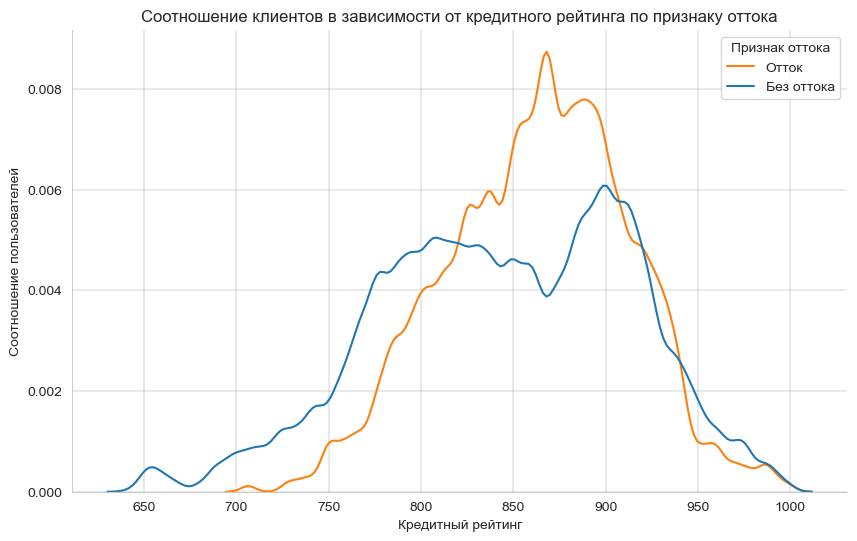

In [20]:
# количество клиентов в зависимости от кредитного рейтинга
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data, x='credit_score', ax=ax, bw_adjust=0.35, common_norm=False, hue='churn')
ax.grid(color='grey', lw=0.25)
ax.set_title("Соотношение клиентов в зависимости от кредитного рейтинга по признаку оттока")
ax.set_xlabel('Кредитный рейтинг')
ax.set_ylabel('Соотношение пользователей')
legend_labels = ['Отток', 'Без оттока']
ax.legend(legend_labels, title='Признак оттока', loc='upper right')
plt.show()

* Вывод: Наиболее подвержены оттоку клиенты со средним кредитным рейтингом

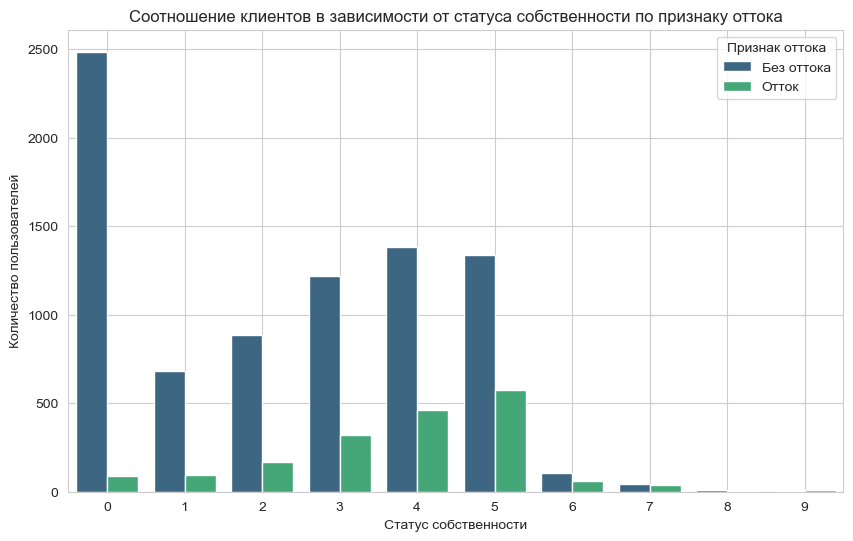

In [21]:
# количество клиентов в зависимости от статуса собственности
plt.figure(figsize=(10, 6))
sns.countplot(x='equity', hue='churn', data=data, palette='viridis')

plt.title('Соотношение клиентов в зависимости от статуса собственности по признаку оттока')
plt.xlabel('Статус собственности')
plt.ylabel('Количество пользователей')
plt.grid(True)
legend_labels = ['Без оттока', 'Отток']
plt.legend(legend_labels, title='Признак оттока', loc='upper right')
plt.show()

* Вывод: наибольший отток наблюдается среди клиентов со статусом от 3 и выше

In [22]:
# что там с балансом...
ax_5 = data.pivot_table(index='products', values='balance', aggfunc=['mean', 'median', 'min', 'max']).reset_index()
ax_5 = round(ax_5, 0).astype(int)
display(ax_5)

,products,mean,median,min,max
,,balance,balance,balance,balance
0,1,611006,415369,6,14802130
1,2,812152,515461,0,119113552
2,3,993888,665382,63,43277100
3,4,1267821,939343,7703,12829755
4,5,610987,282262,8127,1501715


In [23]:
# что там с доходом...
ax_6 = data.pivot_table(index='products', values='income', aggfunc=['mean', 'median', 'min', 'max']).reset_index()
ax_6 = round(ax_6, 0).astype(int)
display(ax_6)

,products,mean,median,min,max
,,income,income,income,income
0,1,180605,142163,2546,1333687
1,2,130400,109508,5342,1395064
2,3,128697,105656,3487,1363550
3,4,148789,122473,5043,1048773
4,5,116652,106034,29398,219672


* Вывод:
    * Лучше всего с доходом у пользователей 1 продукта. У пользователей 5 продуктов самый восокий минимум, и самый низкий максимум - очень узкий коридор.

* Вывод раздела:
    * наличие кредитной карты не сильно влияет на отток;
    * График показывает повышенный отток для двух возрастных категорий: 18-29 лет и 53-59 лет;
    * Среди городов наибольший признак оттока показывает Ярославль;
    * Пользователи 4х продуктов наиболее подвержены решению об уходе. Также именно эта группа имеет наибольший средний и медианный доход. А вот максимальный баланс для этой группы один из самых низких. Клиенты этой группы имеют хороший доход, но, похоже, не хранят все средства в банке.

### Срезы и графики

In [24]:
display(data)

,user_id,credit_score,credit_category,age,age_category,equity,balance,products,credit_card,last_activity,income,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender
0,183012,850,средний,25,18-29 лет,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Рыбинск,Ж
1,146556,861,средний,37,30-39 лет,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Рыбинск,Ж
2,120722,892,средний,30,30-39 лет,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Рыбинск,Ж
3,225363,866,средний,51,40-52 лет,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ярославль,Ж
4,157978,730,плохой,34,30-39 лет,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,Ярославль,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,средний,27,18-29 лет,1,78144.65,1,0,1,18943.64,0,0,1,0,1,0,Рыбинск,М
9996,139170,894,средний,46,40-52 лет,0,NaN,1,1,0,196898.29,0,0,1,0,0,1,Ярославль,М
9997,115639,903,хороший,24,18-29 лет,0,NaN,2,1,1,108905.09,0,0,1,0,0,1,Ярославль,М
9998,148700,777,плохой,68,60+ лет,3,865457.97,3,0,1,86874.90,0,1,0,0,0,1,Ярославль,Ж


equity,0,1,2,3,4,5,6,7,8,9
products,,,,,,,,,,
1,1959,255,191,288,301,283,27,16,2,1
2,547,432,709,980,1138,1176,80,38,11,8
3,58,71,117,199,274,280,25,10,2,2
4,12,13,32,70,129,169,29,16,2,2
5,0,2,2,3,5,7,0,0,0,0


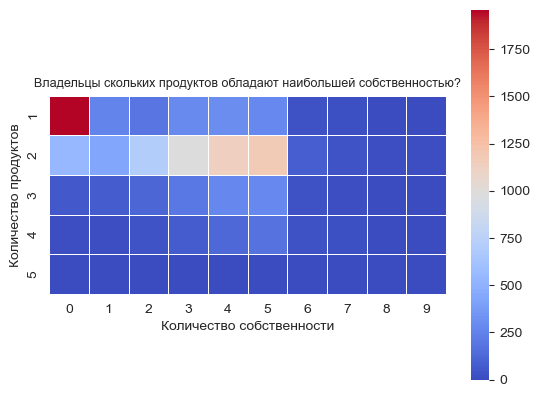

In [25]:
#продукты - собственность
axe_1 = data.pivot_table(index='products', columns='equity', values='user_id', aggfunc='count')
axe_1 = axe_1.fillna(0)
axe_1 = round(axe_1, 0).astype(int)
display(axe_1)

sns.heatmap(axe_1, linewidth=.5, cmap= 'coolwarm', square=bool)
plt.xlabel('Количество собственности')
plt.ylabel('Количество продуктов')
plt.title('Владельцы скольких продуктов обладают наибольшей собственностью?', size=9)
plt.show()

city,Ростов,Рыбинск,Ярославль
products,,,
1,524307,608247,639524
2,657757,708154,917976
3,771982,820126,1057647
4,1068130,1066129,1377092
5,211534,1142013,687186


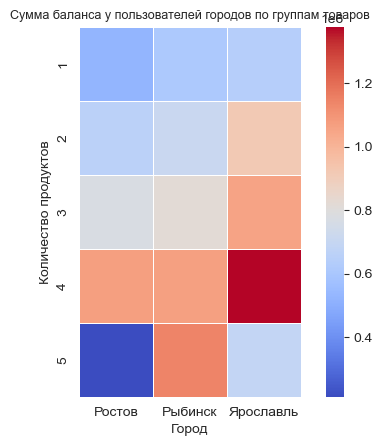

In [26]:
#продукты - баланс городов
axe_2 = data.pivot_table(index='products', columns='city', values='balance', aggfunc='mean')
axe_2 = round(axe_2, 0).astype(int)
display(axe_2)

sns.heatmap(axe_2, linewidth=.5, cmap= 'coolwarm', square=bool)
plt.xlabel('Город')
plt.ylabel('Количество продуктов')
plt.title('Сумма баланса у пользователей городов по группам товаров', size=9)
plt.show()

In [27]:
#проверим инфу в 4 группе, где наибольшее количество оттока
data_4 = data.query('products == 4')
#display(data_4)

In [28]:
print(round(data_4['credit_category'].value_counts(normalize=True) * 100, 2))

средний          64.14
хороший          28.27
очень хороший     5.91
плохой            1.69
Name: credit_category, dtype: float64


In [29]:
print(round(data_4['age_category'].value_counts(normalize=True) * 100, 2))

30-39 лет    44.51
40-52 лет    29.75
18-29 лет    12.03
53-59 лет    11.60
60+ лет       2.11
Name: age_category, dtype: float64


In [30]:
print(round(data_4['last_activity'].value_counts(normalize=True) * 100, 2))

1    78.9
0    21.1
Name: last_activity, dtype: float64


In [31]:
print(round(data_4['city'].value_counts(normalize=True) * 100, 2))

Ярославль    64.77
Рыбинск      20.89
Ростов       14.35
Name: city, dtype: float64


In [32]:
print(round(data_4['gender'].value_counts(normalize=True) * 100, 2))

М    62.24
Ж    37.76
Name: gender, dtype: float64


In [33]:
print(round(data_4['credit_card'].value_counts(normalize=True) * 100, 2))

1    68.14
0    31.86
Name: credit_card, dtype: float64


* Вывод:
    * Портрет типичного пользователя 4х продуктов: молодой мужчина со средним рейтингом из Ярославля, в 70% случаев имеет кредитку, проявляет активность.

In [34]:
# проверим инфу во 2 группе, где наибольшее количество собственности
data_2 = data.query('products == 2')
#display(data_2)

In [35]:
print(round(data_2['credit_category'].value_counts(normalize=True) * 100, 2))

средний          57.41
плохой           21.98
хороший          17.11
очень хороший     3.50
Name: credit_category, dtype: float64


In [36]:
print(round(data_2['age_category'].value_counts(normalize=True) * 100, 2))

30-39 лет    35.50
40-52 лет    28.72
18-29 лет    12.07
60+ лет      11.99
53-59 лет    11.72
Name: age_category, dtype: float64


In [37]:
print(round(data_2['last_activity'].value_counts(normalize=True) * 100, 2))

1    51.55
0    48.45
Name: last_activity, dtype: float64


In [38]:
print(round(data_2['city'].value_counts(normalize=True) * 100, 2))

Ярославль    53.80
Рыбинск      30.47
Ростов       15.73
Name: city, dtype: float64


In [39]:
print(round(data_2['gender'].value_counts(normalize=True) * 100, 2))

Ж    52.28
М    47.72
Name: gender, dtype: float64


In [40]:
print(round(data_2['credit_card'].value_counts(normalize=True) * 100, 2))

1    62.57
0    37.43
Name: credit_card, dtype: float64


* Вывод:
    * Портрет типичного пользователя 2х продуктов: молодые мужчина и женщина, преймущественно из Ярославля, в 60% случаев имеет кредитку, уровень оттока - 50/50.

In [41]:
# у кого из мужчин и женщин во второй группе чаще проявляется признак оттока
d_count = data_2.groupby('gender')['churn'].count()
print(d_count)

gender
Ж    2676
М    2443
Name: churn, dtype: int64


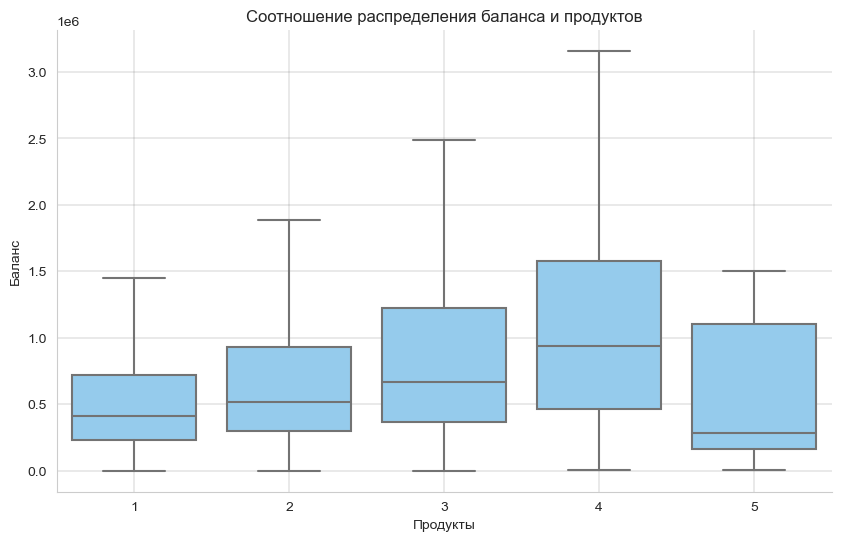

In [42]:
# доходы и баланс групп продуктов
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=False, ax=ax)
sns.boxplot(data=data, x='products', y='balance', color='lightskyblue', showfliers=False, ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title("Соотношение распределения баланса и продуктов")
ax.set_xlabel('Продукты')
ax.set_ylabel('Баланс')
plt.show()

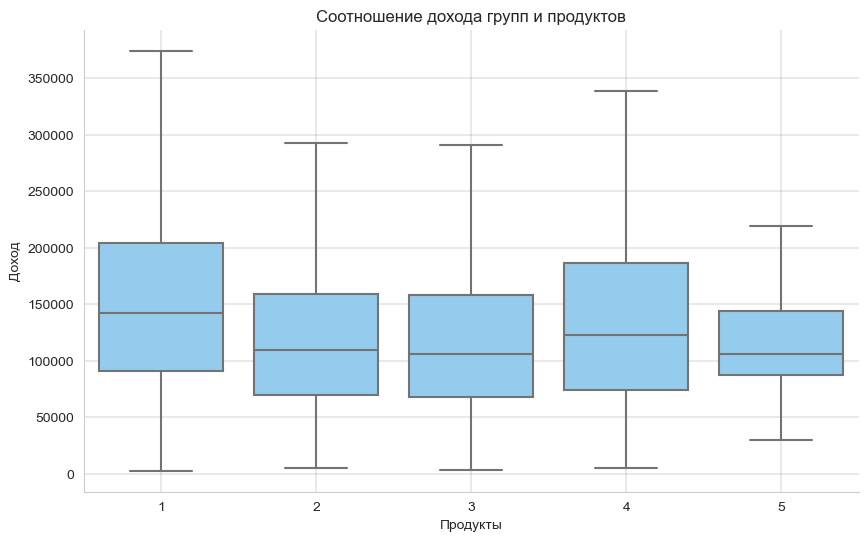

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=False, ax=ax)
sns.boxplot(data=data, x='products', y='income', color='lightskyblue', showfliers=False, ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title("Соотношение дохода групп и продуктов")
ax.set_xlabel('Продукты')
ax.set_ylabel('Доход')
plt.show()

* Вывод:
    * При похожем среднем доходе среди групп, баланс растёт при увеличении количества продуктов (за исключением 5 группы). Кажется, 4 группа наиболее склонна оставлять на счетах большее количество средств.

* Вывод раздела (для удобства терминологии - группа = кол-во продуктов):
    * Больше всего собственности у представителей 2 группы
    * 4 группа наиболее представлена в Ярославле
    * Портрет типичного пользователя 4й группы: молодой мужчина со средним рейтингом из Ярославля, в 70% случаев имеет кредитку, проявляет активность.
    * При похожем среднем доходе среди групп, баланс растёт при увеличении количества продуктов (за исключением 5 группы). Кажется, 4 группа наиболее склонна оставлять на счетах большее количество средств.

### Корреляционный анализ

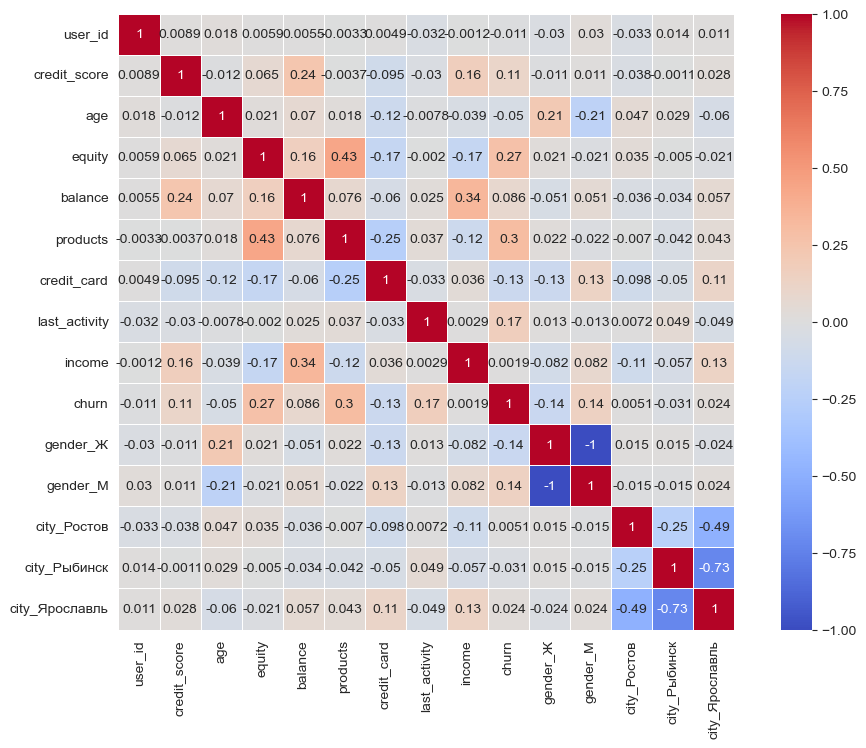

In [44]:
# корреляционная матрица
warm_data = data.drop(['credit_category', 'age_category', 'city', 'gender'], axis=1)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(warm_data.corr(), linewidth=.5, cmap= 'coolwarm', annot=True, square=bool)
plt.show()

* Вывод раздела - сильнее всего к оттоку тяготеют следующие признаки, у которых корреляция >= 10%:
    * количество продуктов;
    * статус собственности;
    * активность;
    * крелитная карта;
    * кредитный рейтинг.

## Статистический анализ

### Тест Шапиро-Уилка на нормальность для гипотезы № 1

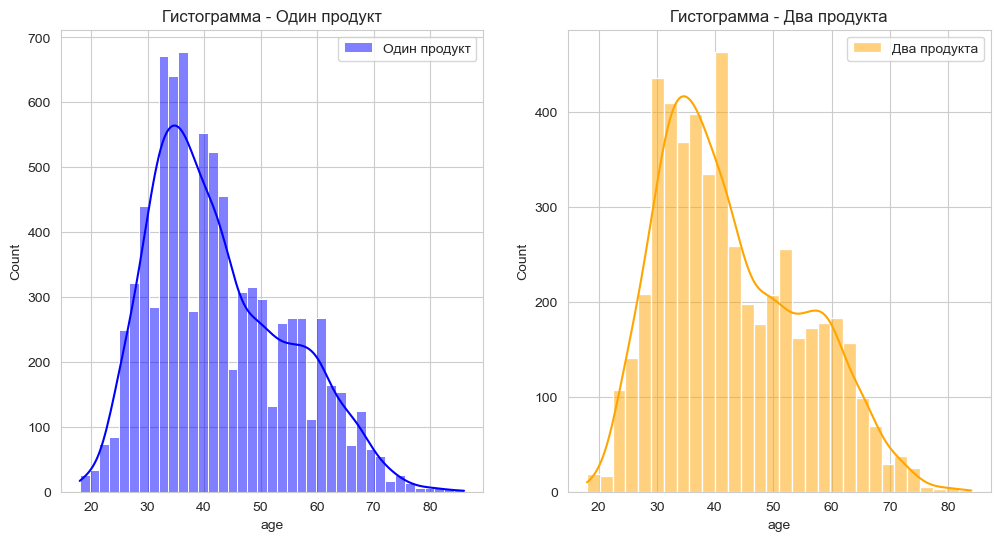

W-результат общей выборки = 0.9609020948410034, p-value = 9.41672568026277e-43


C:\Users\D15\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [45]:
subset_data = data[['products', 'age']]

# фильтруем
one_product = subset_data[subset_data['products'] == 1]['age']
two_products = subset_data[subset_data['products'] == 2]['age']

# соединяем в один
common_sample = pd.concat([one_product, two_products])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(common_sample, kde=True, color='blue', label='Один продукт')
plt.title('Гистограмма - Один продукт')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(two_products, kde=True, color='orange', label='Два продукта')
plt.title('Гистограмма - Два продукта')
plt.legend()

plt.show()

stat_common_sample, p_value_common_sample = shapiro(common_sample)

print(f"W-результат общей выборки = {stat_common_sample}, p-value = {p_value_common_sample}")

* Гипотеза 1: Между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, есть различия в возрасте.
    * H₀ - Существует значительная разница в возрасте между клиентами которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
    * H₁ - Не существует значительной разницы в возрасте между клиентами которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

In [46]:
# отбираем нужные колонны
subset_data = data[['products', 'age']]

one_product = subset_data[subset_data['products'] == 1]['age']
two_products = subset_data[subset_data['products'] == 2]['age']

# создание теста
t_stat, p_value = ttest_ind(one_product, two_products)

# вывод результатов
print(f"t-test: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Существует значительная разница в возрасте между клиентами которые пользуются двумя продуктами банка, и теми, которые пользуются одним.")
else:
    print("Не существует значительной разницы в возрасте между клиентами которые пользуются двумя продуктами банка, и теми, которые пользуются одним.")

t-test: -2.126200997421728
P-value: 0.03351546829239861
Существует значительная разница в возрасте между клиентами которые пользуются двумя продуктами банка, и теми, которые пользуются одним.


* Гипотеза 2: Между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя, есть различия в активности.
    * H₀ - Существует значительная разница в активности между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя.
    * H₁ - Не существует значительной разницы в активности между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя.

In [47]:
subset_data_2 = data[['products', 'last_activity']]

data_product_2 = subset_data_2[subset_data_2['products'] == 2]
data_product_3 = subset_data_2[subset_data_2['products'] == 3]

success_2 = data_product_2['last_activity'].sum()
success_3 = data_product_3['last_activity'].sum()

total_2 = len(data_product_2)
total_3 = len(data_product_3)

z_stat, p_value = proportions_ztest([success_2, success_3], [total_2, total_3])

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Существует значительная разница в активности между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя.")
else:
    print("Не существует значительной разницы в активности между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя.")

Z-statistic: 5.836946838637189
P-value: 5.316604996817637e-09
Существует значительная разница в активности между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя.


## Промежуточный итог

* Предварительный итог:
    * Между данными и признаком оттока выявленны следующие зависимости (к оттоку тяготеют):
        * клиенты, пользователи 3х и более продуктов;
        * клиенты, не имеющие кредитной карты;
        * возрастные группы: 18-29 лет и 53-59 лет;
        * в разных городах примерно равное кол-во пользователей;
        * клиенты, обладатели среднего кредитного рейтинга;
        * клиенты, со статусом собственности от 3х и выше;
    * Также можно констатировать, что с повышением уровня используемых продуктов, увеличивается баланс счёта (справедливо до группы  из 5 продуктов). Уровень дохода в разрезе количества используемых продуктов распределён без сильного разброса (для 1 и 4 группы сильнее). 

## Сегментация на основе выделенных показателей

* Основываясь на корреляции и используя признаки, у который корреляция > 10%, оставим следующие показатели:
    * кредитный рейтинг
    * мужской пол
    * активность
    * статус собственности
    * кол-во продуктов

In [48]:
# общий уровень оттока
total_churn = data['churn'].mean()
churn_critical = 0.05
print(round(total_churn, 2) * 100, '%')

18.0 %


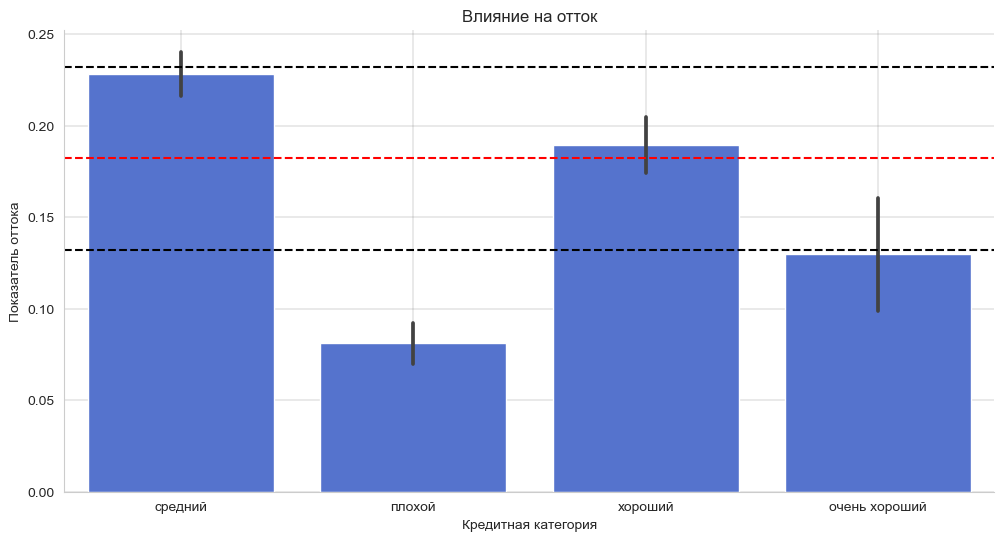

In [49]:
# кредитный рейтинг
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='credit_category', y='churn', ax=ax, color='royalblue')

# границы критичности
ax.axhline(total_churn, label='Общий отток', c='red', ls='--')
ax.axhline(total_churn + churn_critical, label='Верхняя граница оттока', c='black', ls='--')
ax.axhline(total_churn - churn_critical, label='Нижняя граница оттока', c='black', ls='--')

ax.grid(color='grey', lw=0.25)
ax.set_title("Влияние на отток")
ax.set_xlabel('Кредитная категория')
ax.set_ylabel('Показатель оттока')
plt.show()

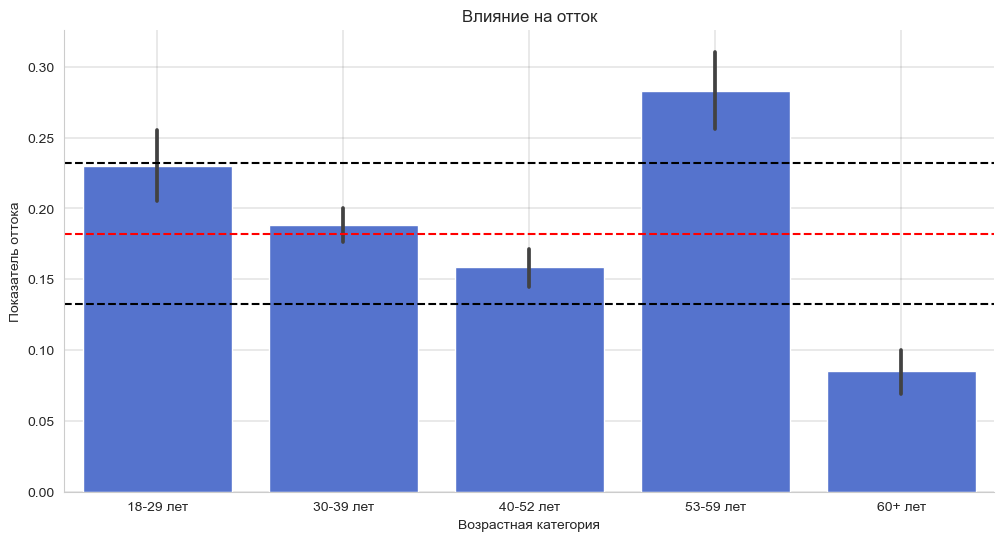

In [50]:
# возрастной рейтинг
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='age_category', y='churn', ax=ax, color='royalblue')

# границы критичности
ax.axhline(total_churn, label='Общий отток', c='red', ls='--')
ax.axhline(total_churn + churn_critical, label='Верхняя граница оттока', c='black', ls='--')
ax.axhline(total_churn - churn_critical, label='Нижняя граница оттока', c='black', ls='--')

ax.grid(color='grey', lw=0.25)
ax.set_title("Влияние на отток")
ax.set_xlabel('Возрастная категория')
ax.set_ylabel('Показатель оттока')
plt.show()

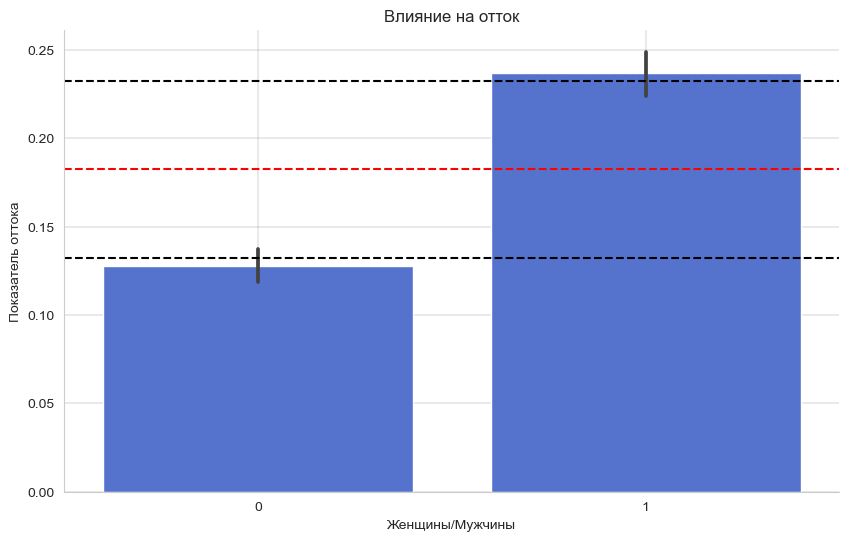

In [51]:
# мужской пол
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='gender_М', y='churn', ax=ax, color='royalblue')

# границы критичности
ax.axhline(total_churn, label='Общий отток', c='red', ls='--')
ax.axhline(total_churn + churn_critical, label='Верхняя граница оттока', c='black', ls='--')
ax.axhline(total_churn - churn_critical, label='Нижняя граница оттока', c='black', ls='--')

ax.grid(color='grey', lw=0.25)
ax.set_title("Влияние на отток")
ax.set_xlabel('Женщины/Мужчины')
ax.set_ylabel('Показатель оттока')
plt.show()

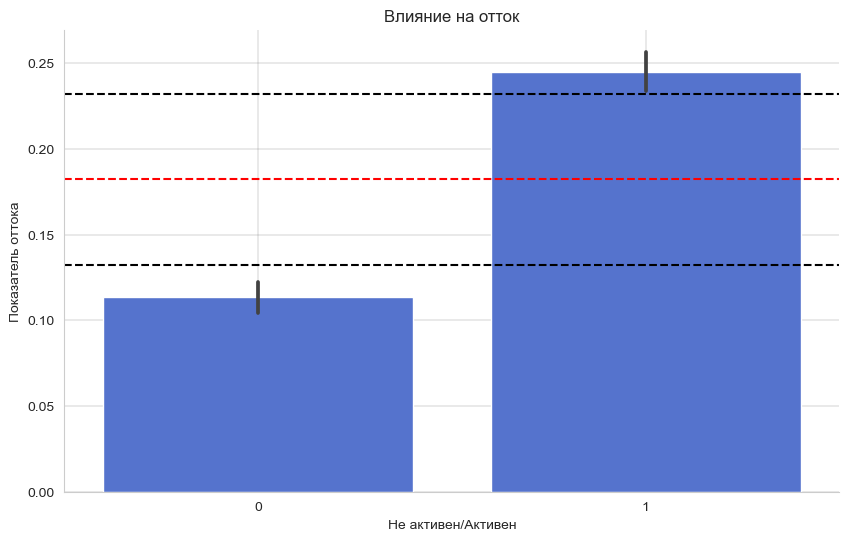

In [52]:
# активность
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='last_activity', y='churn', ax=ax, color='royalblue')

# границы критичности
ax.axhline(total_churn, label='Общий отток', c='red', ls='--')
ax.axhline(total_churn + churn_critical, label='Верхняя граница оттока', c='black', ls='--')
ax.axhline(total_churn - churn_critical, label='Нижняя граница оттока', c='black', ls='--')

ax.grid(color='grey', lw=0.25)
ax.set_title("Влияние на отток")
ax.set_xlabel('Не активен/Активен')
ax.set_ylabel('Показатель оттока')
plt.show()

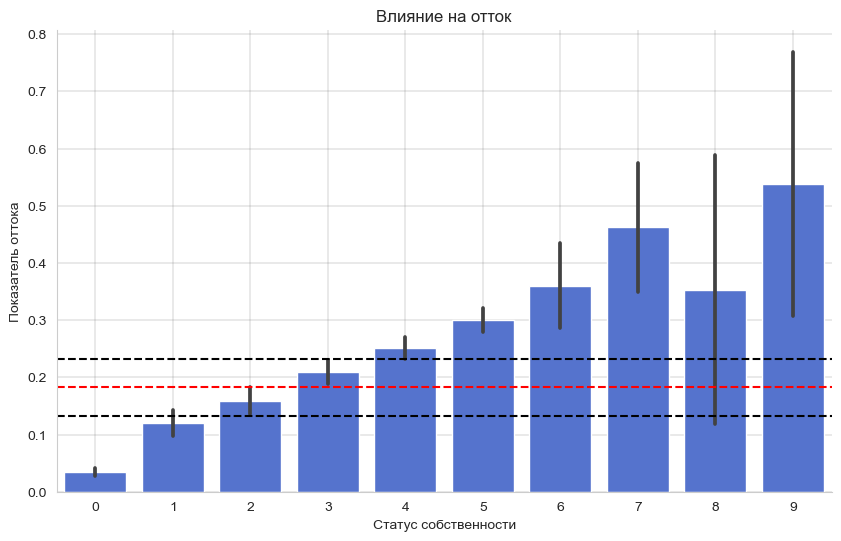

In [53]:
#статус собственности
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='equity', y='churn', ax=ax, color='royalblue')

# границы критичности
ax.axhline(total_churn, label='Общий отток', c='red', ls='--')
ax.axhline(total_churn + churn_critical, label='Верхняя граница оттока', c='black', ls='--')
ax.axhline(total_churn - churn_critical, label='Нижняя граница оттока', c='black', ls='--')

ax.grid(color='grey', lw=0.25)
ax.set_title("Влияние на отток")
ax.set_xlabel('Статус собственности')
ax.set_ylabel('Показатель оттока')
plt.show()

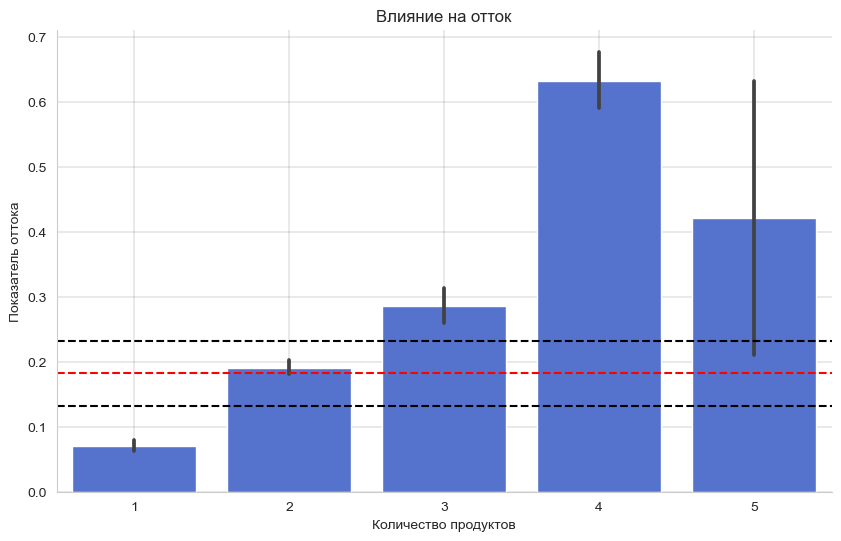

In [54]:
#количество продуктов
fig, ax = plt.subplots(figsize=(10, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=data, x='products', y='churn', ax=ax, color='royalblue')

# границы критичности
ax.axhline(total_churn, label='Общий отток', c='red', ls='--')
ax.axhline(total_churn + churn_critical, label='Верхняя граница оттока', c='black', ls='--')
ax.axhline(total_churn - churn_critical, label='Нижняя граница оттока', c='black', ls='--')

ax.grid(color='grey', lw=0.25)
ax.set_title("Влияние на отток")
ax.set_xlabel('Количество продуктов')
ax.set_ylabel('Показатель оттока')
plt.show()

* Вывод (признаки оттока):
    * не рассматриваем кредитный рейтинг как признак;
    * мужская половина клиентов является признаком;
    * активность клиентов является признаком;
    * статус собственности является признаком;
    * количество продуктов также является признаком.

### Приоритизация полученных показателей

* Из проанализированных 5 признаков для сегментации берём:
    * кредитная карта;
    * активные клиенты;
    * возрастные группы;
    * статус собственности, имеющий значения 0, 1, 4+
    * количество продуктов (все, кроме 2х)

* Критерии сегментации:
    * не более 3х;
    * отточность/неотточность;
    * разнообразие;
    * размер сегмента в пределах 300-1000 клиентов.

In [55]:
#display(data)

In [56]:
# сегмент 1:
data_q1 = data.query('equity == 1').query('credit_card == 1')
#display(data_q1)

In [57]:
seg_1 = pd.DataFrame({
    'Условие(я) выделения сегмента': ['клиенты, имеющие кредитную карту и статус собственности равен 1'],
    'Доля оттока': [f"{round(data_q1['churn'].mean() * 100, 2)}%"],
    'Средний кредитный рейтинг': [round(data_q1['credit_score'].mean(), 0)],
    'Средний возраст': [f"{round(data_q1['age'].mean(), 0)} лет"],
    'Медианный баланс': [data_q1['balance'].median()],
    'Медианный доход': [data_q1['income'].median()],
})

display(seg_1)
print('Доля м и ж: ', (round(data_q1['gender'].value_counts(normalize=True).to_frame(name=''), 2) * 100))
print('Доля городов: ', (round(data_q1['city'].value_counts(normalize=True).to_frame(name=''), 2) * 100))
print('Доля активности: ', (round(data_q1['last_activity'].value_counts(normalize=True).to_frame(name=''), 2) * 100))

,Условие(я) выделения сегмента,Доля оттока,Средний кредитный рейтинг,Средний возраст,Медианный баланс,Медианный доход
0,"клиенты, имеющие кредитную карту и статус собс...",12.2%,826.0,42.0 лет,194153.61,104378.475


Доля м и ж:         
М  55.0
Ж  45.0
Доля городов:                 
Ярославль  57.0
Рыбинск    28.0
Ростов     14.0
Доля активности:         
1  52.0
0  48.0


* Рекомендации по сегменту: среди молодых пользователей кредитных карт низкий уровень оттока. Но также и низкий медианный баланс. Данной группе можно предложить продукты по накопительным счетам.

In [58]:
# сегмент 2:
data_q2 = data.query('age_category == "53-59 лет"')
#display(data_q2)

In [59]:
seg_2 = pd.DataFrame({
    'Условие(я) выделения сегмента': ['клиенты в возрасте 53-59 лет'],
    'Доля оттока': [f"{round(data_q2['churn'].mean() * 100, 2)}%"],
    'Средний кредитный рейтинг': [round(data_q2['credit_score'].mean(), 0)],
    'Средний возраст': [f"{round(data_q2['age'].mean(), 0)} лет"],
    'Медианный баланс': [data_q2['balance'].median()],
    'Медианный доход': [data_q2['income'].median()],
})

display(seg_2)
print('Доля м и ж: ', (round(data_q2['gender'].value_counts(normalize=True).to_frame(name=''), 2) * 100))
print('Доля городов: ', (round(data_q2['city'].value_counts(normalize=True).to_frame(name=''), 2) * 100))
print('Доля активности: ', (round(data_q2['last_activity'].value_counts(normalize=True).to_frame(name=''), 2) * 100))

,Условие(я) выделения сегмента,Доля оттока,Средний кредитный рейтинг,Средний возраст,Медианный баланс,Медианный доход
0,клиенты в возрасте 53-59 лет,28.31%,847.0,56.0 лет,639412.785,99793.975


Доля м и ж:         
Ж  57.0
М  43.0
Доля городов:                 
Ярославль  51.0
Рыбинск    32.0
Ростов     16.0
Доля активности:         
1  51.0
0  49.0


* Рекомендации: среди указанной возрастной категории можно предложить (расширить) специальные продукты, включающие какие-либо пенсионные предложения.

In [62]:
# сегмент 3:
data_q3 = data.query('products >= 4').query('last_activity == 1')
#display(data_q3)

In [61]:
seg_3 = pd.DataFrame({
    'Условие(я) выделения сегмента': ['клиенты с 4 продуктами, проявляющие активность'],
    'Доля оттока': [f"{round(data_q3['churn'].mean() * 100, 2)}%"],
    'Средний кредитный рейтинг': [round(data_q3['credit_score'].mean(), 0)],
    'Средний возраст': [f"{round(data_q3['age'].mean(), 0)} лет"],
    'Медианный баланс': [data_q3['balance'].median()],
    'Медианный доход': [data_q3['income'].median()],
})

display(seg_3)
print('Доля м и ж: ', (round(data_q3['gender'].value_counts(normalize=True).to_frame(name=''), 2) * 100))
print('Доля городов: ', (round(data_q3['city'].value_counts(normalize=True).to_frame(name=''), 2) * 100))
print('Доля кредитных карт: ', (round(data_q3['credit_card'].value_counts(normalize=True).to_frame(name=''), 2) * 100))

,Условие(я) выделения сегмента,Доля оттока,Средний кредитный рейтинг,Средний возраст,Медианный баланс,Медианный доход
0,"клиенты с 4 продуктами, проявляющие активность",54.99%,872.0,39.0 лет,725760.89,116355.48


Доля м и ж:         
М  60.0
Ж  40.0
Доля городов:                 
Ярославль  62.0
Рыбинск    23.0
Ростов     15.0
Доля кредитных карт:         
1  68.0
0  32.0


* Рекомендации: для данного сегмента характерен самый высокий медианный баланс и высока доля кредитных карт. Возможно, необходимо пересмотреть условия пользования определёнными продуктами на более лояльные (возможно, по сниженным процентным ставкам). Также можно выполнить реорганизацию продуктов (объединить, упразднить и тд), что может уменьшить дополнительную плату со стороны клиента

## Выводы и рекомендации для заказчика

* На основе имеющихся данных, проведя полное аналитическое исследование, можно утверждать, что необходимо произвести дальнейшую работу со следующими сегментами пользователей:
    * сегмент № 1: клиенты, имеющие кредитную карту и статус собственности равен 1:
        * среди молодых пользователей кредитных карт низкий уровень оттока. Но также и низкий медианный баланс. Данной группе можно предложить продукты по накопительным счетам;
    * сегмент № 2: клиенты в возрасте 53-59 лет:
        * среди указанной возрастной категории можно увеличить предложения по выпуску кредитных карт. Это должно уменьшить уровень оттока;
    * сегмент № 3: клиенты с 4 продуктами, проявляющие активность:
        * для данного сегмента характерен самый высокий медианный баланс и высока доля кредитных карт. Возможно, необходимо пересмотреть условия пользования определёнными продуктами на более лояльные (возможно, по сниженным процентным ставкам).